<a href="https://colab.research.google.com/github/anton-akulenko/HW02-DS/blob/main/DS_HW05_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from google.colab import drive

In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
all_data_folder = "/content/drive/MyDrive/tests_colab/data/"


In [4]:
os.listdir('/content/drive/MyDrive/tests_colab/data/')

['idle', 'running', 'walking', 'stairs', 'merged_accelerometer_data.csv']

In [5]:
all_data = pd.DataFrame()

In [6]:
# Run once
for activity_name in os.listdir(all_data_folder):
  activity_path = os.path.join(all_data_folder, activity_name)
  if not os.path.isdir(activity_path):
    continue

  csv_files = [f for f in os.listdir(activity_path) if f.endswith('.csv')]
  for file_name in os.listdir(activity_path):
        csv_file_path = os.path.join(activity_path, file_name)
        if not file_name.endswith('.csv'):
            continue

        df = pd.read_csv(csv_file_path)
        df['activity'] = activity_name
        all_data = pd.concat([all_data, df], ignore_index=True)

print(all_data.head(), all_data.shape)


   accelerometer_X  accelerometer_Y  accelerometer_Z activity
0         0.162806         6.890513         6.818687     idle
1         0.330400         6.426038         9.260772     idle
2        -0.248997         6.967127         6.363788     idle
3         0.043096         6.952762         5.975928     idle
4        -0.373495         6.517017         6.354212     idle (193860, 4)


# **Create merged .csv**

In [7]:
# all_data.to_csv("/content/drive/MyDrive/tests_colab/data/merged_accelerometer_data.csv")

In [8]:
df = pd.read_csv("/content/drive/MyDrive/tests_colab/data/merged_data.csv", index_col=False)
all_data = df.iloc[: , 1:]
# print(all_data, all_data['activity'].unique())
act = all_data['activity'].unique()
total = 0
for activity_type in act:
  print(f"{activity_type}: {all_data[all_data['activity'] == activity_type].shape[0]}")
  total += all_data[all_data['activity'] == activity_type].shape[0]
total

idle: 31170
running: 102240
walking: 55500
stairs: 4950


193860

In [9]:
act = all_data['activity'].unique()
# total = 0
for activity_type in act:
  print(f"{activity_type}: {all_data['activity'].value_counts()[activity_type]}")
#   total += all_data[all_data['activity'] == activity_type].shape[0]
# total

idle: 31170
running: 102240
walking: 55500
stairs: 4950


Plot initial data

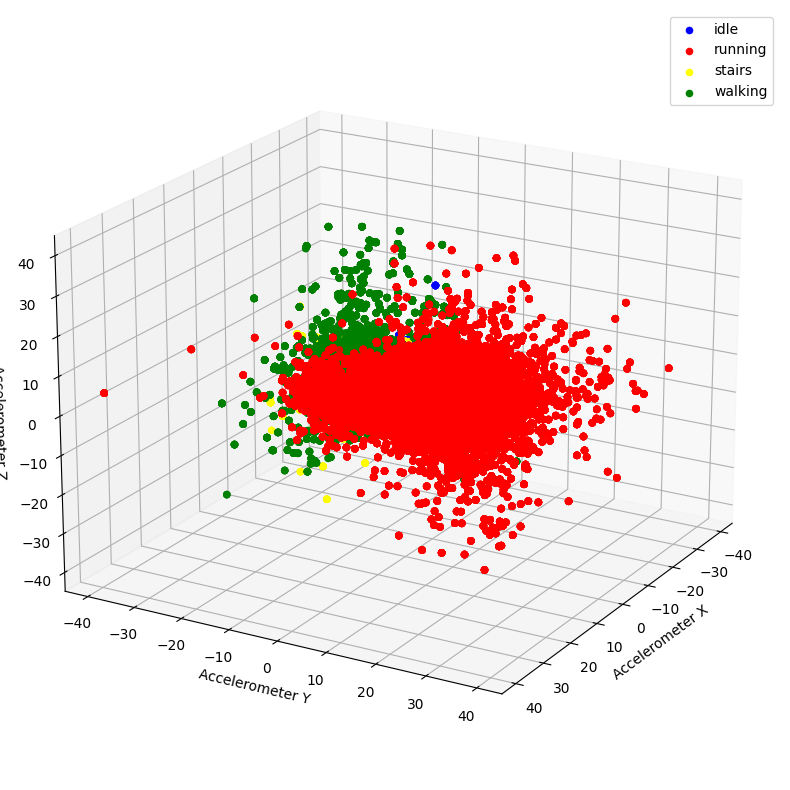

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

data = all_data
df = pd.DataFrame(data)

fig = plt.figure(figsize=(10, 10), alpha=0.4)
ax = fig.add_subplot(111, projection='3d')
colors = {'idle': 'blue', 'walking': 'green', 'running': 'red', 'stairs': 'yellow'}

for activity, group in df.groupby('activity'):
    ax.scatter(group['accelerometer_X'], group['accelerometer_Y'], group['accelerometer_Z'], c=colors[activity], label=activity)

ax.set_xlabel('Accelerometer X')
ax.set_ylabel('Accelerometer Y')
ax.set_zlabel('Accelerometer Z')

ax.legend()
ax.view_init(elev=20, azim=30)
plt.show()
plt.tight_layout()


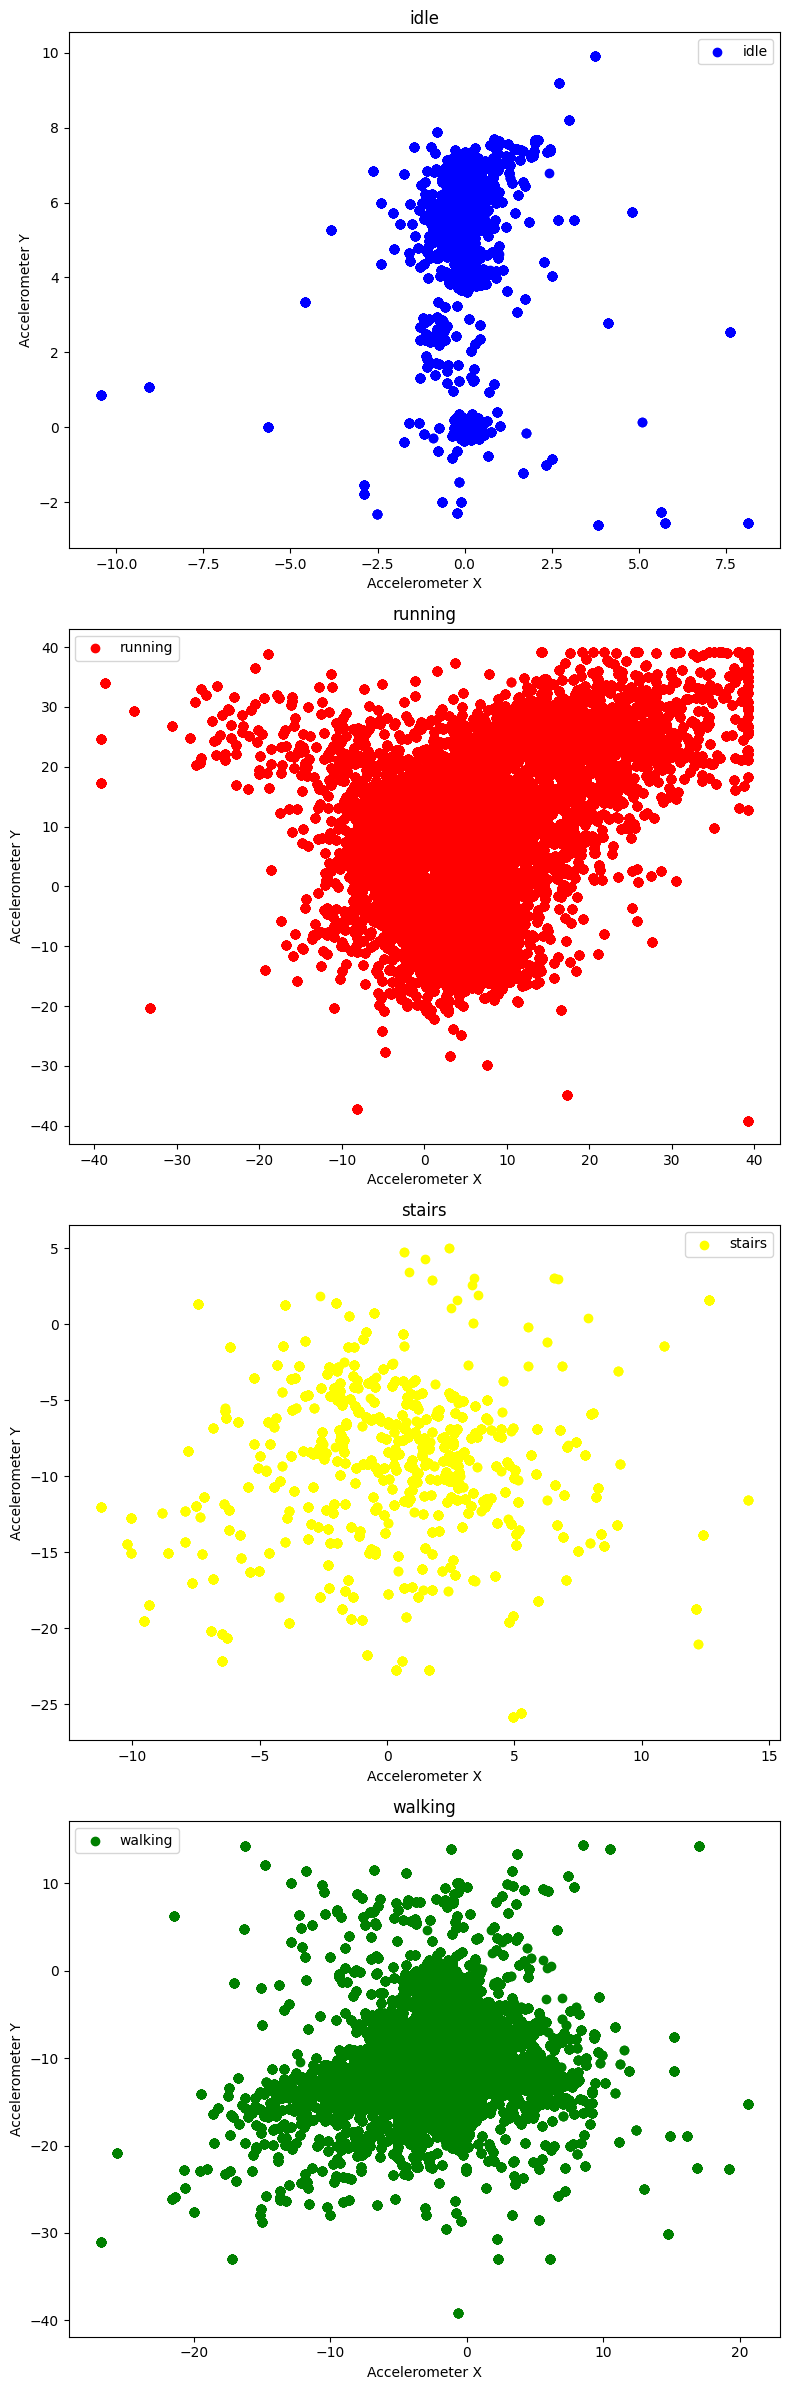

In [ ]:
grouped = df.groupby('activity')

fig, axes = plt.subplots(len(grouped), 1, figsize=(8, 6*len(grouped)))

for i, (activity, group) in enumerate(grouped):
    ax = axes[i]
    ax.scatter(group['accelerometer_X'], group['accelerometer_Y'], c=colors[activity], label=activity)
    ax.set_title(activity)
    ax.set_xlabel('Accelerometer X')
    ax.set_ylabel('Accelerometer Y')
    ax.legend()

plt.tight_layout()
plt.show()

In [13]:
X = all_data[all_data.columns[:-1]].values
y = all_data[all_data.columns[-1]].values


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)



In [33]:
svm_model = SVC()
rfc_model = RandomForestClassifier()

In [34]:
rfc_ = rfc_model.fit(X_train, y_train)

In [37]:
svm = svm_model.fit(X_train, y_train)

In [42]:
svm_report = classification_report(y_test, svm.predict(X_test))
print("SVM Results:")
print(svm_report)

rfc_report = classification_report(y_test, rfc_.predict(X_test))
print("Random Forest Results:")
print(rfc_report)

SVM Results:
              precision    recall  f1-score   support

        idle       0.96      0.99      0.97      6203
     running       0.93      0.90      0.92     20485
      stairs       1.00      0.00      0.00       915
     walking       0.81      0.91      0.85     11169

    accuracy                           0.90     38772
   macro avg       0.92      0.70      0.69     38772
weighted avg       0.90      0.90      0.89     38772

Random Forest Results:
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6203
     running       1.00      1.00      1.00     20485
      stairs       1.00      0.99      1.00       915
     walking       1.00      1.00      1.00     11169

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00     38772



In [ ]:
X_train

In [ ]:
X_test

**Prediction**

# **Grid** search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have already split your data into training and testing sets
# X_train, X_test, y_train, y_test = ...

# Create a Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be a leaf node
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)
# Create a Random Forest Classifier with the best hyperparameters
best_rfc = RandomForestClassifier(random_state=42, **best_params)

# Fit the model with the best hyperparameters to the training data
best_rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rfc.predict(X_test)

# Evaluate the model's accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)


**Choose model**

In [ ]:
# pip install lazypredict

In [ ]:
import lazypredict
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn import preprocessing

# Next, we use lazypredict to identify the machine learning regressor model that can potentially predict sepal width:
df_choice = all_data
le = preprocessing.LabelEncoder()
df_choice['activity_encoded'] = le.fit_transform(df_choice['activity'])
X = df_choice.drop(["activity"], axis=1)
Y = df_choice["activity_encoded"]
Xp = np.abs(X)
Xp , Y

# le = preprocessing.LabelEncoder()
# df_choice['activity_encoded'] = le.fit_transform(df_choice['activity'])
# # le.fit(list(Y))
# # # LabelEncoder()
# # tt =list(le.classes_)
# # tt
# # trans = le.transform(tt)
# # trans, Y
# # # array([2, 2, 1]...)
# # list(le.inverse_transform(trans))
# # # ['tokyo', 'tokyo', 'paris']
# df_choice

# X = df_choice.drop(["activity", "activity_encoded"], axis=1)
# X
# Y = df_choice["activity_encoded"]
# Y
X_train, X_test, y_train, y_test = train_test_split(Xp, Y, test_size = 0.2, random_state = 64)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models,pred = reg.fit(X_train, X_test, y_train, y_test)
models

In [ ]:
import lazypredict
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn import preprocessing
df_choice = all_data
# Assuming df_choice contains your data with 'activity_encoded' column
le = preprocessing.LabelEncoder()
df_choice['activity_encoded'] = le.fit_transform(df_choice['activity'])

# Split the data into features (X) and the target variable (Y)
X = df_choice.drop(["activity", "activity_encoded"], axis=1)
Y = df_choice["activity_encoded"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=64)

# Create a LazyRegressor instance
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

# Fit and evaluate the models
models, pred = reg.fit(X_train, X_test, y_train, y_test)

# List of models and their respective performance metrics
print(models)


In [ ]:
import lazypredict
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn import preprocessing
df_choice = all_data

df_cat_to_array = pd.get_dummies(df_choice, dtype=float)
# df_cat_to_array = df_cat_to_array.drop("activity", axis=1)
# df_cat_to_array['activity_running']
df_cat_to_array[df_cat_to_array['activity_running'] == 1]

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
# The Lazy Classifier can then be executed with the following command:
df_choice = all_data
# Assuming df_choice contains your data with 'activity_encoded' column
# le = preprocessing.LabelEncoder()
# df_choice['activity_encoded'] = le.fit_transform(df_choice['activity'])
df_cat_to_array = pd.get_dummies(df_choice)
# Split the data into features (X) and the target variable (Y)
# X = df_cat_to_array.drop(["activity_running"], axis=1)
# Y = df_cat_to_array["activity_running"]
X =  df_cat_to_array.drop(["activity_running", "activity_walking", "activity_idle"], axis=1)
Y = df_cat_to_array["activity_stairs"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state =55)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

# REDO

In [ ]:
# X = all_data.drop('activity', axis=1)
# y = all_data['activity']

In [ ]:
# from numpy.random import test
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# svm_model = SVC()
# rfc_model = RandomForestClassifier()

In [ ]:
svc_ = svm_model.fit(X_train, y_train)

In [ ]:
# svc_r = svm_model.fit(X_train_r, y_train_r)

In [ ]:
rfc_ = rfc_model.fit(X_train, y_train)

In [27]:
svm_prediction = svm_model.predict(X_test)

In [ ]:
rfc_prediction = rfc_model.predict(X_test)

In [ ]:
svm_report = classification_report(y_test, svm_prediction)
print("SVM Results:")
print(svm_report)

rfc_report = classification_report(y_test, rfc_prediction)
print("Random Forest Results:")
print(rfc_report)

SVM Results:
              precision    recall  f1-score   support

        idle       0.96      0.98      0.97      6203
     running       0.93      0.91      0.92     20485
      stairs       1.00      0.00      0.00       915
     walking       0.81      0.90      0.85     11169

    accuracy                           0.90     38772
   macro avg       0.93      0.70      0.69     38772
weighted avg       0.90      0.90      0.89     38772

Random Forest Results:
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      6203
     running       1.00      1.00      1.00     20485
      stairs       1.00      0.99      1.00       915
     walking       1.00      1.00      1.00     11169

    accuracy                           1.00     38772
   macro avg       1.00      1.00      1.00     38772
weighted avg       1.00      1.00      1.00     38772

